In [49]:
import pandas as pd

In [136]:
df = pd.read_csv("adult.csv")
df = pd.get_dummies(df)
df = df[df.columns.drop('sex_ Female')]
df = df[df.columns.drop('income_ <=50K')]

In [137]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2)
df_train_x = df_train.loc[:,df.columns != 'income_ >50K']
df_train_y = df_train['income_ >50K']
df_test_x = df_test.loc[:,df.columns != 'income_ >50K']
df_test_y = df_test['income_ >50K']

In [123]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(df_train_x, df_train_y)
from sklearn.metrics import accuracy_score
print("accuracy original = {}".format(accuracy_score(clf.predict(df_test_x), df_test_y)))
#accuracy_original = accuracy_score(clf.predict(data_test_x), data_test_y)
from sklearn.metrics import f1_score
#f1_original = f1_score(clf.predict(data_test_x), data_test_y)
print("f1_original = {}".format(f1_score(clf.predict(df_test_x), df_test_y)))

accuracy original = 0.8135940219060293
f1_original = 0.6119752823353931


In [138]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier()
clf = clf.fit(df_train_x, df_train_y)
from sklearn.metrics import accuracy_score
print("accuracy original = {}".format(accuracy_score(clf.predict(df_test_x), df_test_y)))
#accuracy_original = accuracy_score(clf.predict(data_test_x), data_test_y)
from sklearn.metrics import f1_score
#f1_original = f1_score(clf.predict(data_test_x), data_test_y)
print("f1_original = {}".format(f1_score(clf.predict(df_test_x), df_test_y)))

accuracy original = 0.8125703756781656
f1_original = 0.5835797134409825


#### Average Precision

In [139]:
from sklearn.metrics import average_precision_score

In [158]:
average_precision_score(df_test_y, clf.predict_proba(df_test_x)[:,1])

0.6101229211818118

In [104]:
df_test_x['pred'] = clf.predict(df_test_x)
df_test_x['real'] = df_test_y

#### Demographpic Parity

In [115]:
df_test_x[(df_test_x['sex_ Male'] == 1) & (df_test_x['pred'] == 1)].shape[0] / df_test_x[df_test_x['sex_ Male'] == 1].shape[0]

0.3089802130898021

In [116]:
df_test_x[(df_test_x['sex_ Male'] == 0) & (df_test_x['pred'] == 1)].shape[0] / df_test_x[df_test_x['sex_ Male'] == 0].shape[0]

0.10847139731165989

#### DEO

In [117]:
df_test_x[(df_test_x['sex_ Male'] == 1) & (df_test_x['pred'] == 1) & (df_test_x['real'] == 1)].shape[0] / df_test_x[(df_test_x['sex_ Male'] == 1) & (df_test_x['real'] == 1)].shape[0]

0.644916540212443

In [118]:
df_test_x[(df_test_x['sex_ Male'] == 0) & (df_test_x['pred'] == 1) & (df_test_x['real'] == 1)].shape[0] / df_test_x[(df_test_x['sex_ Male'] == 0) & (df_test_x['real'] == 1)].shape[0]

0.5794392523364486

In [58]:
import pandas as pd
import numpy as np

In [55]:
df = pd.read_csv("results_newhsci.log", skiprows=2)

In [62]:
df[df[' lambda'] == 0.3][' f1']

0     0.533730
13    0.535166
26    0.532166
Name:  f1, dtype: float64

In [67]:
list(df[' lambda'].unique())

[0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5]

In [71]:
for i in list(df[' lambda'].unique()):
    print("lambda :{}".format(i))
    print("f1: {}".format(df[df[' lambda'] == i][' f1'].mean()))
    print("acc: {}".format(df[df[' lambda'] == i][' acc'].mean()))
    print("dp: {}".format(df[df[' lambda'] == i][' dp'].mean()))
    print("deo: {}".format(df[df[' lambda'] == i][' deo'].mean()))

lambda :0.3
f1: 0.5336873333333334
acc: 0.7629233333333333
dp: 0.09218333333333334
deo: -0.06940433333333333
lambda :0.4
f1: 0.5273853333333333
acc: 0.761729
dp: 0.07130333333333333
deo: -0.13335633333333333
lambda :0.5
f1: 0.5212123333333333
acc: 0.7555533333333333
dp: 0.05518666666666666
deo: -0.12509
lambda :0.6
f1: 0.514031
acc: 0.7606715
dp: 0.075347
deo: -0.0941535
lambda :0.7
f1: 0.5184655
acc: 0.7584195
dp: 0.0673775
deo: -0.0847735
lambda :0.8
f1: 0.49639200000000006
acc: 0.7525335
dp: 0.0692595
deo: -0.002747000000000001
lambda :0.9
f1: 0.490547
acc: 0.745317
dp: 0.0700375
deo: -0.043817499999999995
lambda :1.0
f1: 0.5051425
acc: 0.7469034999999999
dp: 0.090694
deo: -0.010612
lambda :1.1
f1: 0.48367150000000003
acc: 0.7392775
dp: 0.063491
deo: -0.0799295
lambda :1.2
f1: 0.48873200000000006
acc: 0.7420415
dp: 0.065594
deo: -0.0512165
lambda :1.3
f1: 0.481564
acc: 0.7454704999999999
dp: 0.0831885
deo: -0.061232
lambda :1.4
f1: 0.504945
acc: 0.7416320000000001
dp: 0.073911499999

In [14]:
df.sort_values(by = ' dp', ascending=True)

,epoch,lambda,acc,f1,pmale,pfemale,dp,omale,ofemale,deo
43,250,0.15,0.770396,0.530065,0.268345,0.216626,0.051719,0.528292,0.629630,-0.101337
9,100,0.14,0.773877,0.547429,0.284333,0.227860,0.056474,0.561331,0.705234,-0.143904
10,100,0.15,0.766813,0.530503,0.275641,0.216661,0.058980,0.529146,0.651811,-0.122665
16,150,0.10,0.761900,0.544636,0.303886,0.244263,0.059623,0.578600,0.700280,-0.121680
5,100,0.10,0.766302,0.540921,0.290234,0.226291,0.063943,0.559701,0.662651,-0.102949
7,100,0.12,0.764971,0.530662,0.285605,0.220105,0.065500,0.547218,0.634831,-0.087613
6,100,0.11,0.765585,0.530160,0.276605,0.204274,0.072331,0.518591,0.648045,-0.129454
19,150,0.13,0.770703,0.526026,0.272379,0.198459,0.073920,0.519608,0.643052,-0.123444
4,100,0.09,0.765687,0.536170,0.290627,0.216453,0.074174,0.548891,0.670487,-0.121596
46,300,0.07,0.748900,0.497851,0.286637,0.210349,0.076288,0.515291,0.551075,-0.035785


In [16]:
import matplotlib.pyplot as plt

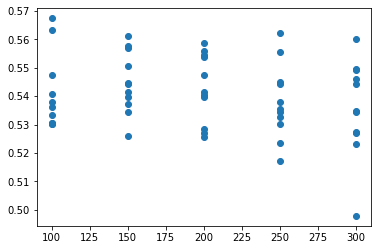

In [21]:
plt.scatter(df['epoch'], df[' f1'])

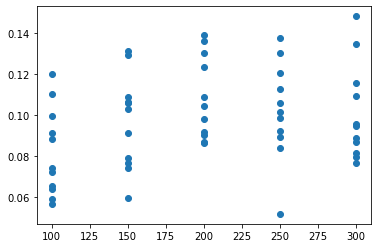

In [22]:
plt.scatter(df['epoch'], df[' dp'])

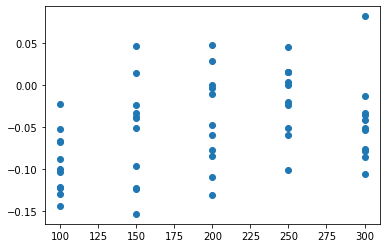

In [23]:
plt.scatter(df['epoch'], df[' deo'])

In [46]:
df = pd.read_csv("results_new.log")

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
df

,epoch,lambda,acc,f1,pmale,pfemale,dp,omale,ofemale,deo
0,100,10.0,0.756679,0.008344,0.004442,0.004937,-0.000494,0.003990,0.005764,-0.001774
1,100,11.0,0.751971,0.008187,0.005192,0.004036,0.001156,0.003413,0.008696,-0.005283
2,100,12.0,0.757601,0.011686,0.004932,0.006705,-0.001773,0.004562,0.013550,-0.008989
3,100,13.0,0.758112,0.002533,0.003092,0.004545,-0.001454,0.000998,0.003040,-0.002042
4,100,14.0,0.757293,0.009193,0.004397,0.004097,0.000300,0.004520,0.005556,-0.001035
5,100,15.0,0.718293,0.435140,0.306276,0.171587,0.134689,0.469460,0.385757,0.083703
6,100,16.0,0.754632,0.010730,0.005531,0.002761,0.002770,0.006510,0.000000,0.006510
7,100,17.0,0.760160,0.012642,0.005382,0.003674,0.001708,0.006572,0.005747,0.000825
8,100,18.0,0.756782,0.006689,0.004131,0.001547,0.002584,0.003474,0.002899,0.000575
9,100,19.0,0.756679,0.010820,0.004885,0.006215,-0.001330,0.004516,0.011173,-0.006657


In [42]:
df[df['epoch'] == 250]

,epoch,lambda,acc,f1,pmale,pfemale,dp,omale,ofemale,deo
33,250,10.0,0.762719,0.542078,0.349081,0.140615,0.208466,0.617542,0.453521,0.164021
34,250,11.0,0.777152,0.550114,0.322261,0.122271,0.199990,0.593058,0.441860,0.151198
35,250,12.0,0.771727,0.552748,0.333180,0.146078,0.187102,0.606137,0.495702,0.110435
36,250,13.0,0.781759,0.545610,0.290653,0.141089,0.149564,0.557975,0.493075,0.064900
37,250,14.0,0.758317,0.524088,0.330904,0.141332,0.189572,0.580222,0.428571,0.151651
38,250,15.0,0.760057,0.538219,0.347713,0.143255,0.204458,0.603916,0.468391,0.135525
39,250,16.0,0.755451,0.529075,0.334151,0.172106,0.162045,0.586120,0.512465,0.073654
40,250,17.0,0.771932,0.542693,0.335976,0.117794,0.218182,0.602285,0.445055,0.157230
41,250,18.0,0.771932,0.549170,0.335635,0.137104,0.198531,0.602690,0.510638,0.092052
42,250,19.0,0.754939,0.522727,0.332572,0.154736,0.177836,0.579828,0.460055,0.119773


In [31]:
accuracies = []
f1s = []
dps = []
deos = []

for i in df[' lambda'].unique().tolist():
    accuracies.append(df[df[' lambda'] == i][' acc'].mean())
    f1s.append(df[df[' lambda'] == i][' f1'].mean())
    dps.append(df[df[' lambda'] == i][' dp'].mean())
    deos.append(df[df[' lambda'] == i][' deo'].mean())

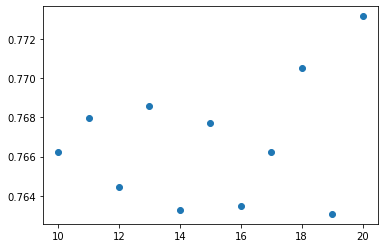

In [34]:
plt.scatter(np.linspace(10,20,11) ,accuracies)

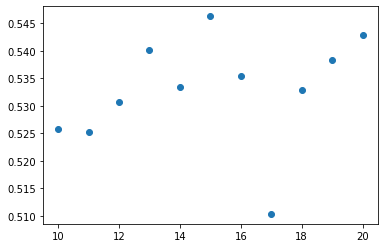

In [35]:
plt.scatter(np.linspace(10,20,11) ,f1s)

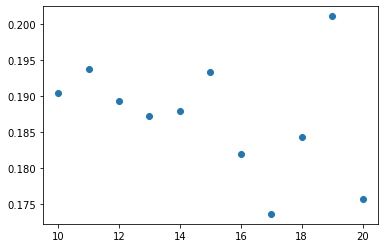

In [36]:
plt.scatter(np.linspace(10,20,11) ,dps)

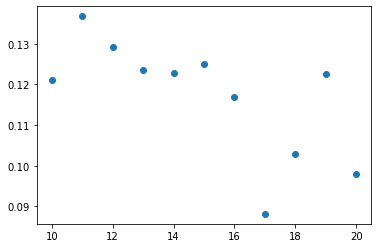

In [37]:
plt.scatter(np.linspace(10,20,11) ,deos)

In [117]:
df[df[' lambda'] == 0.10][' acc']

25    0.766199
26    0.778688
27    0.773569
28    0.758727
29    0.759546
Name:  acc, dtype: float64

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [150]:
df = pd.read_csv("results_newhsci.log")

In [151]:
df.index = df[' lambda']
df[' deo'] = df[' deo'].abs()
df[' dp'] = df[' dp'].abs()

In [152]:
df_100 = df[df['epoch'] == 100]
df_150 = df[df['epoch'] == 150]
df_200 = df[df['epoch'] == 200]
df_250 = df[df['epoch'] == 250]

In [153]:
df_100

,epoch,lambda,acc,f1,pmale,pfemale,dp,omale,ofemale,deo
lambda,,,,,,,,,,
0.3,100,0.3,0.759443,0.533730,0.298254,0.219527,0.078727,0.551263,0.632153,0.080890
0.4,100,0.4,0.752687,0.515443,0.299568,0.220164,0.079404,0.536749,0.637532,0.100783
0.5,100,0.5,0.746955,0.505204,0.283584,0.241552,0.042032,0.513459,0.641944,0.128485
0.6,100,0.6,0.761081,0.526572,0.292761,0.211115,0.081647,0.542532,0.646302,0.103770
0.7,100,0.7,0.751561,0.504795,0.286289,0.223465,0.062824,0.522739,0.602817,0.080078
0.8,100,0.8,0.743065,0.470687,0.274803,0.214720,0.060083,0.489362,0.522667,0.033305
0.9,100,0.9,0.738254,0.487267,0.298968,0.209237,0.089731,0.520202,0.497312,0.022890
1.0,100,1.0,0.744191,0.506029,0.306825,0.209360,0.097465,0.540327,0.532578,0.007749
1.1,100,1.1,0.726482,0.454471,0.284308,0.224839,0.059468,0.469429,0.547619,0.078190


(0.0, 0.15)

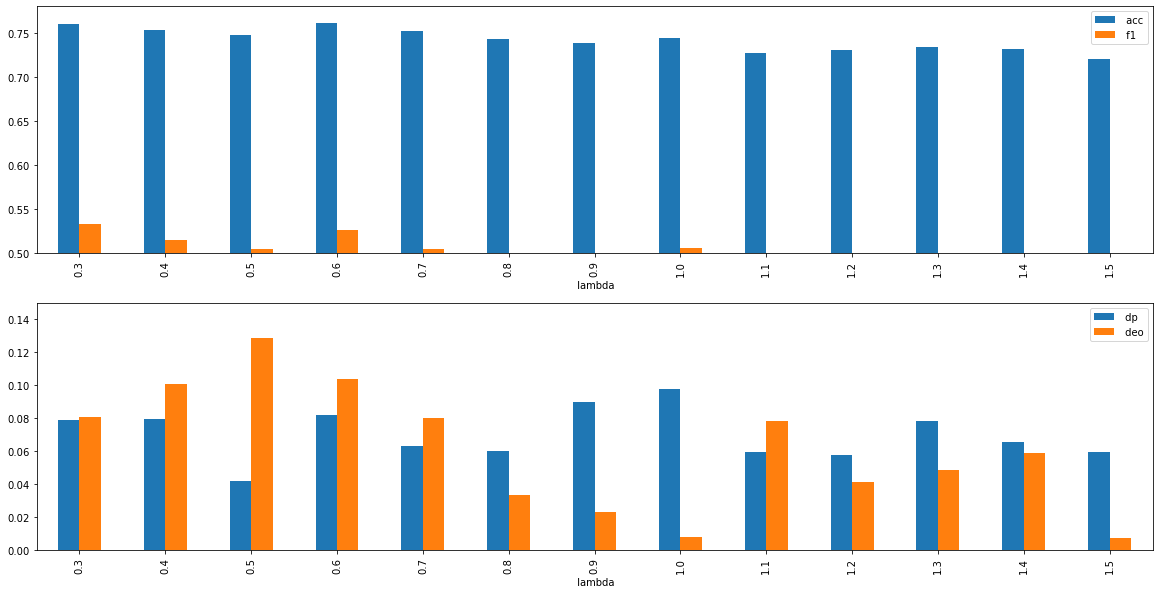

In [155]:
#plt.figure(figsize=(20,10))
fig = plt.figure()
ax1 = fig.add_subplot(211)
df_100[[' acc', ' f1']].plot(kind='bar', ax=ax1, figsize=(20,10))
ax1.set_ylim(0.5,0.78)

ax2 = fig.add_subplot(212)
df_100[[' dp', ' deo']].plot(kind='bar', ax=ax2, figsize=(20,10))
ax2.set_ylim(0.0,0.15)

(0.0, 0.15)

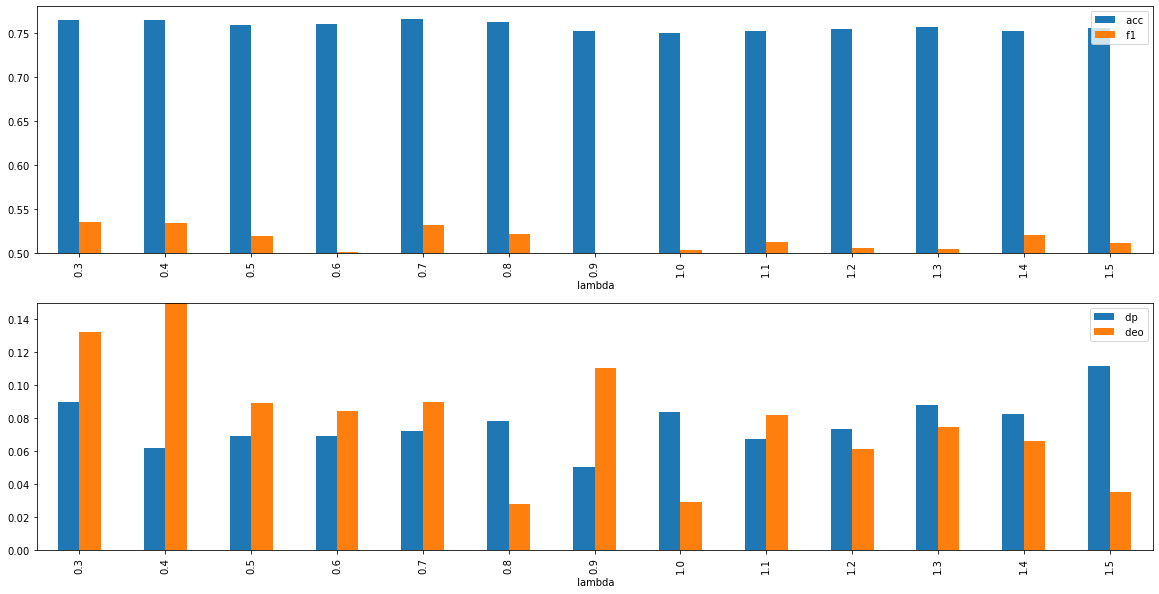

In [157]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
df_150[[' acc', ' f1']].plot(kind='bar', ax=ax1, figsize=(20,10))
ax1.set_ylim(0.5,0.78)

ax2 = fig.add_subplot(212)
df_150[[' dp', ' deo']].plot(kind='bar', ax=ax2, figsize=(20,10))
ax2.set_ylim(0.0,0.15)

In [164]:
#150 8

(0.0, 0.15)

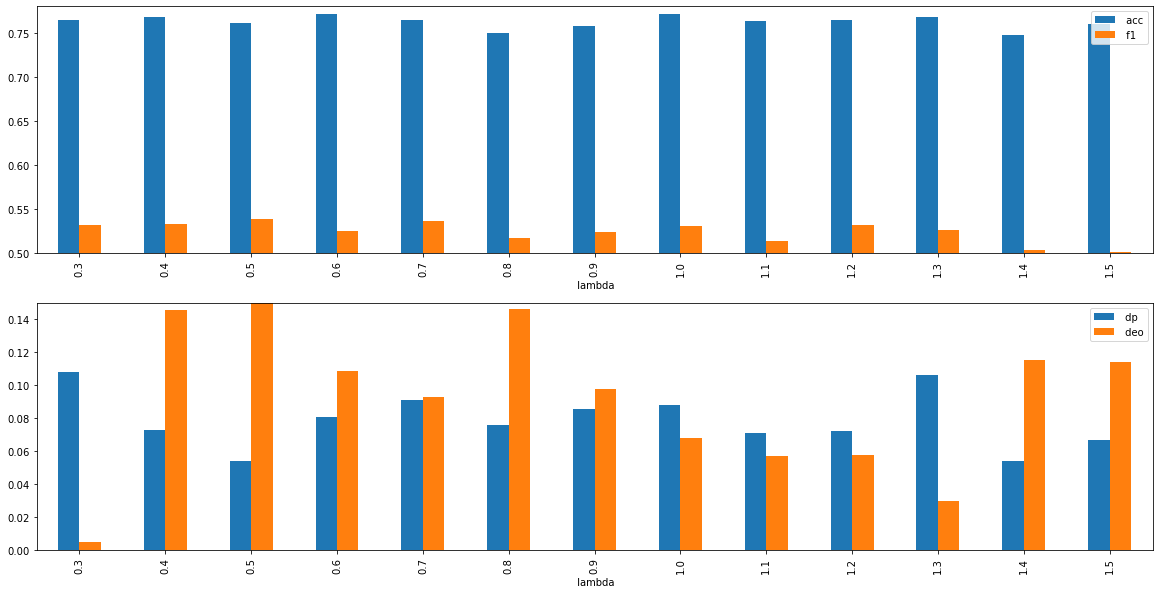

In [158]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
df_200[[' acc', ' f1']].plot(kind='bar', ax=ax1, figsize=(20,10))
ax1.set_ylim(0.5,0.78)

ax2 = fig.add_subplot(212)
df_200[[' dp', ' deo']].plot(kind='bar', ax=ax2, figsize=(20,10))
ax2.set_ylim(0.0,0.15)

(0.0, 0.15)

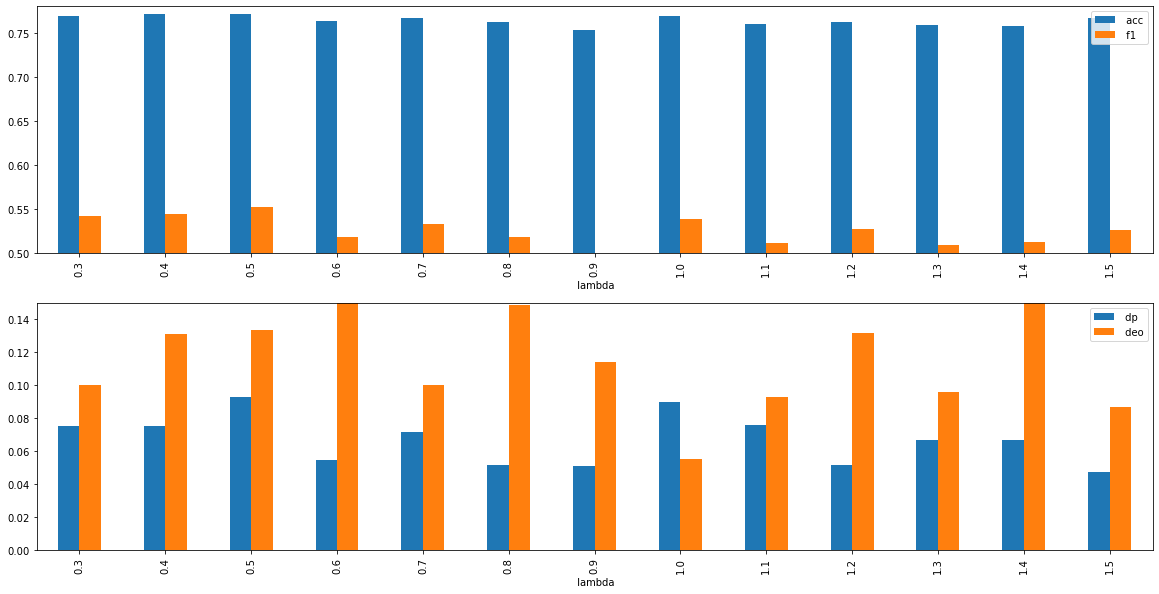

In [159]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
df_250[[' acc', ' f1']].plot(kind='bar', ax=ax1, figsize=(20,10))
ax1.set_ylim(0.5,0.78)

ax2 = fig.add_subplot(212)
df_250[[' dp', ' deo']].plot(kind='bar', ax=ax2, figsize=(20,10))
ax2.set_ylim(0.0,0.15)

In [165]:
df

,epoch,lambda,acc,f1,pmale,pfemale,dp,omale,ofemale,deo
lambda,,,,,,,,,,
0.3,100,0.3,0.759443,0.533730,0.298254,0.219527,0.078727,0.551263,0.632153,0.080890
0.4,100,0.4,0.752687,0.515443,0.299568,0.220164,0.079404,0.536749,0.637532,0.100783
0.5,100,0.5,0.746955,0.505204,0.283584,0.241552,0.042032,0.513459,0.641944,0.128485
0.6,100,0.6,0.761081,0.526572,0.292761,0.211115,0.081647,0.542532,0.646302,0.103770
0.7,100,0.7,0.751561,0.504795,0.286289,0.223465,0.062824,0.522739,0.602817,0.080078
0.8,100,0.8,0.743065,0.470687,0.274803,0.214720,0.060083,0.489362,0.522667,0.033305
0.9,100,0.9,0.738254,0.487267,0.298968,0.209237,0.089731,0.520202,0.497312,0.022890
1.0,100,1.0,0.744191,0.506029,0.306825,0.209360,0.097465,0.540327,0.532578,0.007749
1.1,100,1.1,0.726482,0.454471,0.284308,0.224839,0.059468,0.469429,0.547619,0.078190


In [167]:
df = pd.read_csv("150epoch8lambda.log")

In [175]:
df[' f1'].abs().mean()

0.5198092857142856